### Exploratory Data Analysis

We'll follow below:
1. Find out categorical and numerical features.
2. Univariate analysis <br> 
   i. Categorical features <br>
   ii. Numerical features <br>
3. Bivariate analysis <br>
   i. Categorical analysis <br>

In [204]:
# Imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [205]:
# Load the processed data
processed_data = pd.read_csv("../data/processed/processed.csv", sep=",")

In [206]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300259 entries, 0 to 300258
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   airline         300259 non-null  object
 1   ch_code         300259 non-null  object
 2   num_code        300259 non-null  int64 
 3   dep_time        300259 non-null  object
 4   from            300259 non-null  object
 5   time_taken      300259 non-null  int64 
 6   stop            300259 non-null  object
 7   arr_time        300259 non-null  object
 8   to              300259 non-null  object
 9   price           300259 non-null  int64 
 10  type            300259 non-null  object
 11  days_left       300259 non-null  int64 
 12  dep_time_phase  300259 non-null  object
 13  arr_time_phase  300259 non-null  object
dtypes: int64(4), object(10)
memory usage: 32.1+ MB


Change data types for ease

In [207]:
processed_data['num_code'] = processed_data['num_code'].apply(str)

#### 1. Find out categorical and numerical features 

In [208]:
processed_data.nunique().sort_values()

type                  2
stop                  3
dep_time_phase        5
arr_time_phase        5
from                  6
to                    6
airline               8
ch_code               8
days_left            49
dep_time            251
arr_time            266
time_taken          369
num_code           1255
price             12165
dtype: int64

In [209]:
categorical_features = []
for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        categorical_features.append(col)
        
print('Categorical features are: {0}'.format(categorical_features))

Categorical features are: ['airline', 'ch_code', 'from', 'stop', 'to', 'type', 'dep_time_phase', 'arr_time_phase']


In [210]:
numerical_features = ['price', 'days_left', 'time_taken']

print('Numerical features are: {0}'.format(numerical_features))

Numerical features are: ['price', 'days_left', 'time_taken']


#### 3. EDA
##### 3.1 univariate Analysis

###### Categorical features

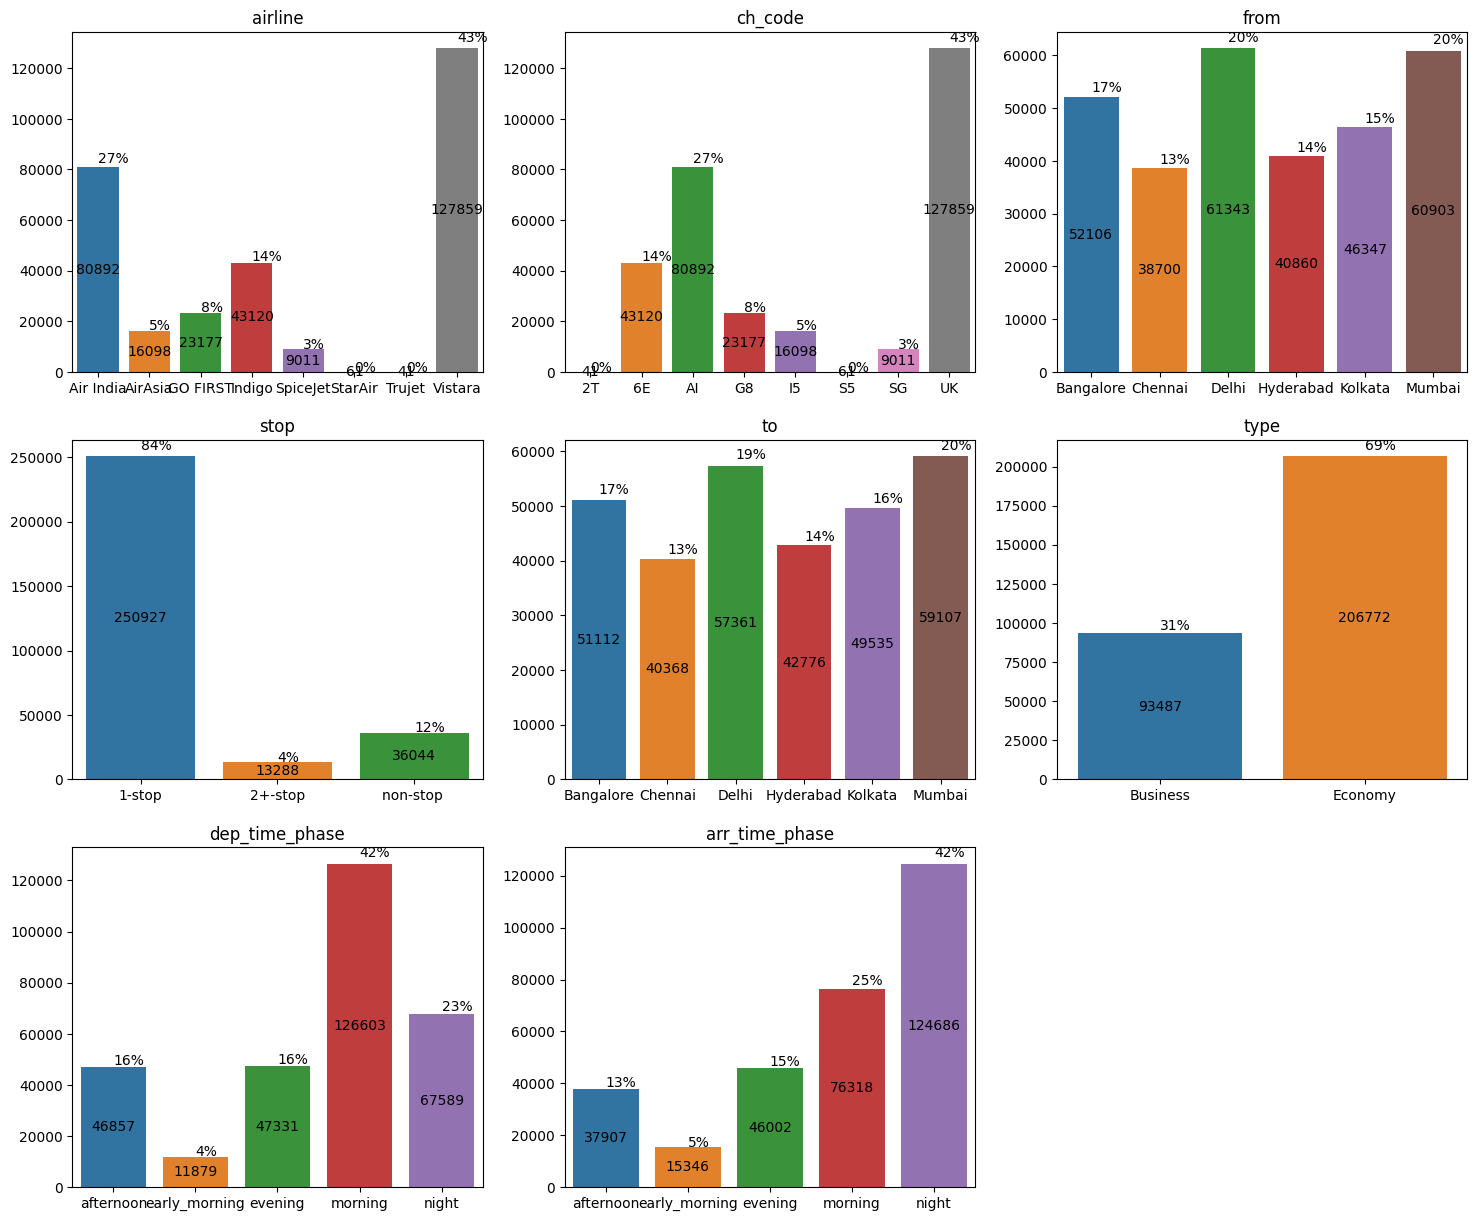

In [211]:
fig = plt.figure(figsize=(18,15))
for index, col in enumerate(categorical_features):
    data = np.unique(processed_data[col], return_counts=True)
    ax1 = fig.add_subplot(3,3,index+1)
    ax1 = sns.barplot(x=data[0], y=data[1])
    
    # Labelling
    ax1.set_title(col)
    ax1.bar_label(ax1.containers[0], label_type='center') # Plot absolute numbers
    # Plot percentages using annotate
    for p in ax1.patches:
        perc = '{:.0f}%'.format(100 * p.get_height()/len(processed_data[col]))
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + (p.get_height()*1.02)
        ax1.annotate(perc, (x, y))
plt.show()


###### Numerical features

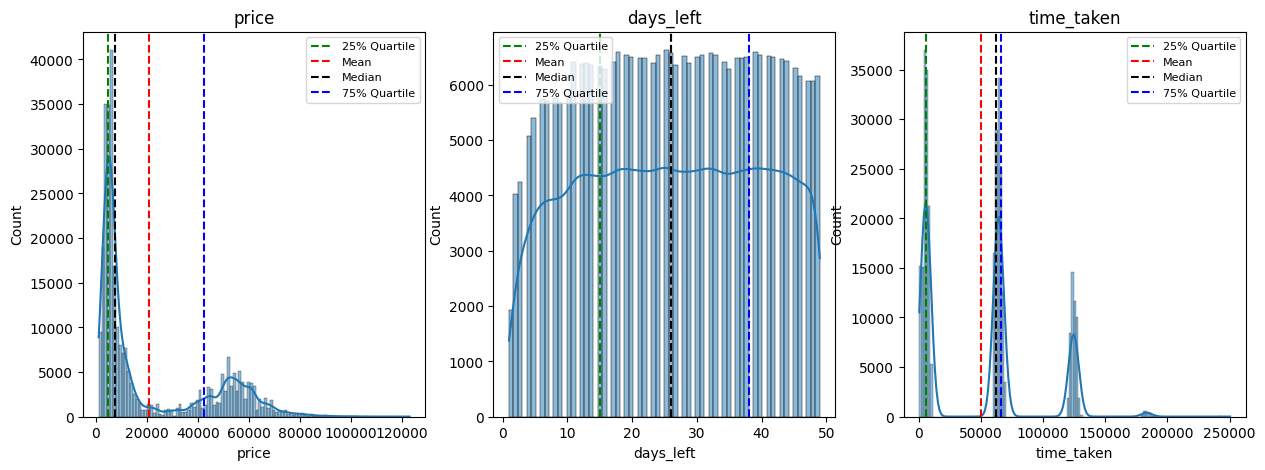

In [212]:
fig = plt.figure(figsize=(15,5))
for index, col in enumerate(numerical_features):
    ax2 = fig.add_subplot(1,3,index+1)
    ax2 = sns.histplot(processed_data[col], kde=True)
    
    ax2.axvline(processed_data[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax2.axvline(processed_data[col].mean(),color='red',linestyle='--',label='Mean')
    ax2.axvline(processed_data[col].median(),color='black',linestyle='--',label='Median')
    ax2.axvline(processed_data[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    
    ax2.set_title(col)
    ax2.legend(fontsize=8)
    
plt.show()

##### Outlier detection

In [214]:
price_q1 = processed_data['price'].quantile(0.25)
print('25th percentile of price: {0}'.format(price_q1))
price_q3 = processed_data['price'].quantile(0.75)
print('75th percentile of price: {0}'.format(price_q3))
price_iqr = price_q3 - price_q1
print('IQR of price: {0}'.format(price_iqr))

25th percentile of price: 4783.0
75th percentile of price: 42521.0
IQR of price: 37738.0


In [215]:
processed_data_price_outliers = processed_data[(processed_data['price'] < (price_q1 - 1.5*price_iqr)) | (processed_data['price'] > (price_q3 + 1.5*price_iqr))]
print('Number of outliers: {0}'.format(len(processed_data_price_outliers)))

Number of outliers: 123


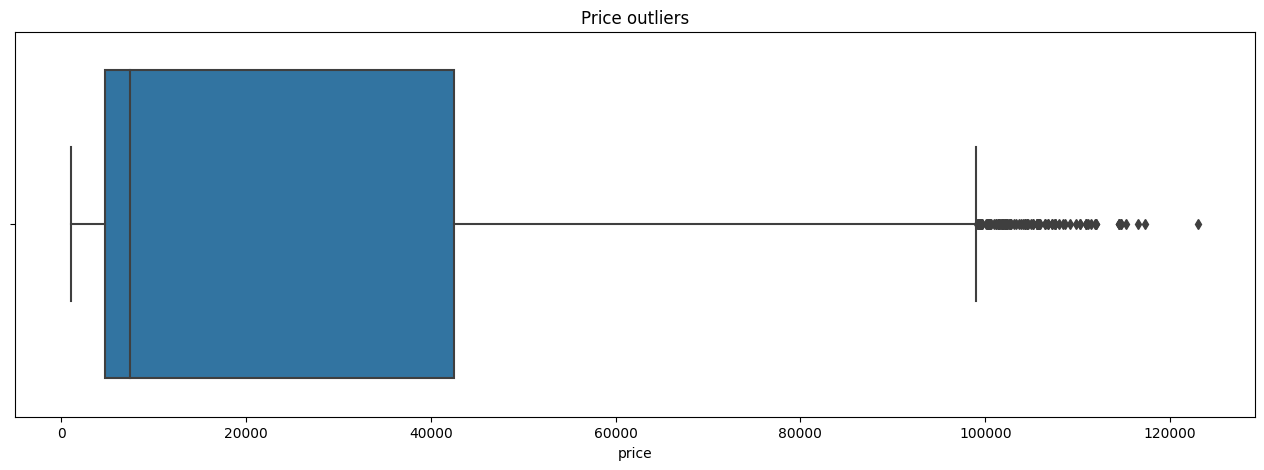

In [216]:
plt.figure(figsize=(16,5))
sns.boxplot(data=processed_data, x='price')
plt.title('Price outliers')
plt.show()

##### 3.2 Bivariate Analysis

###### Categorical features

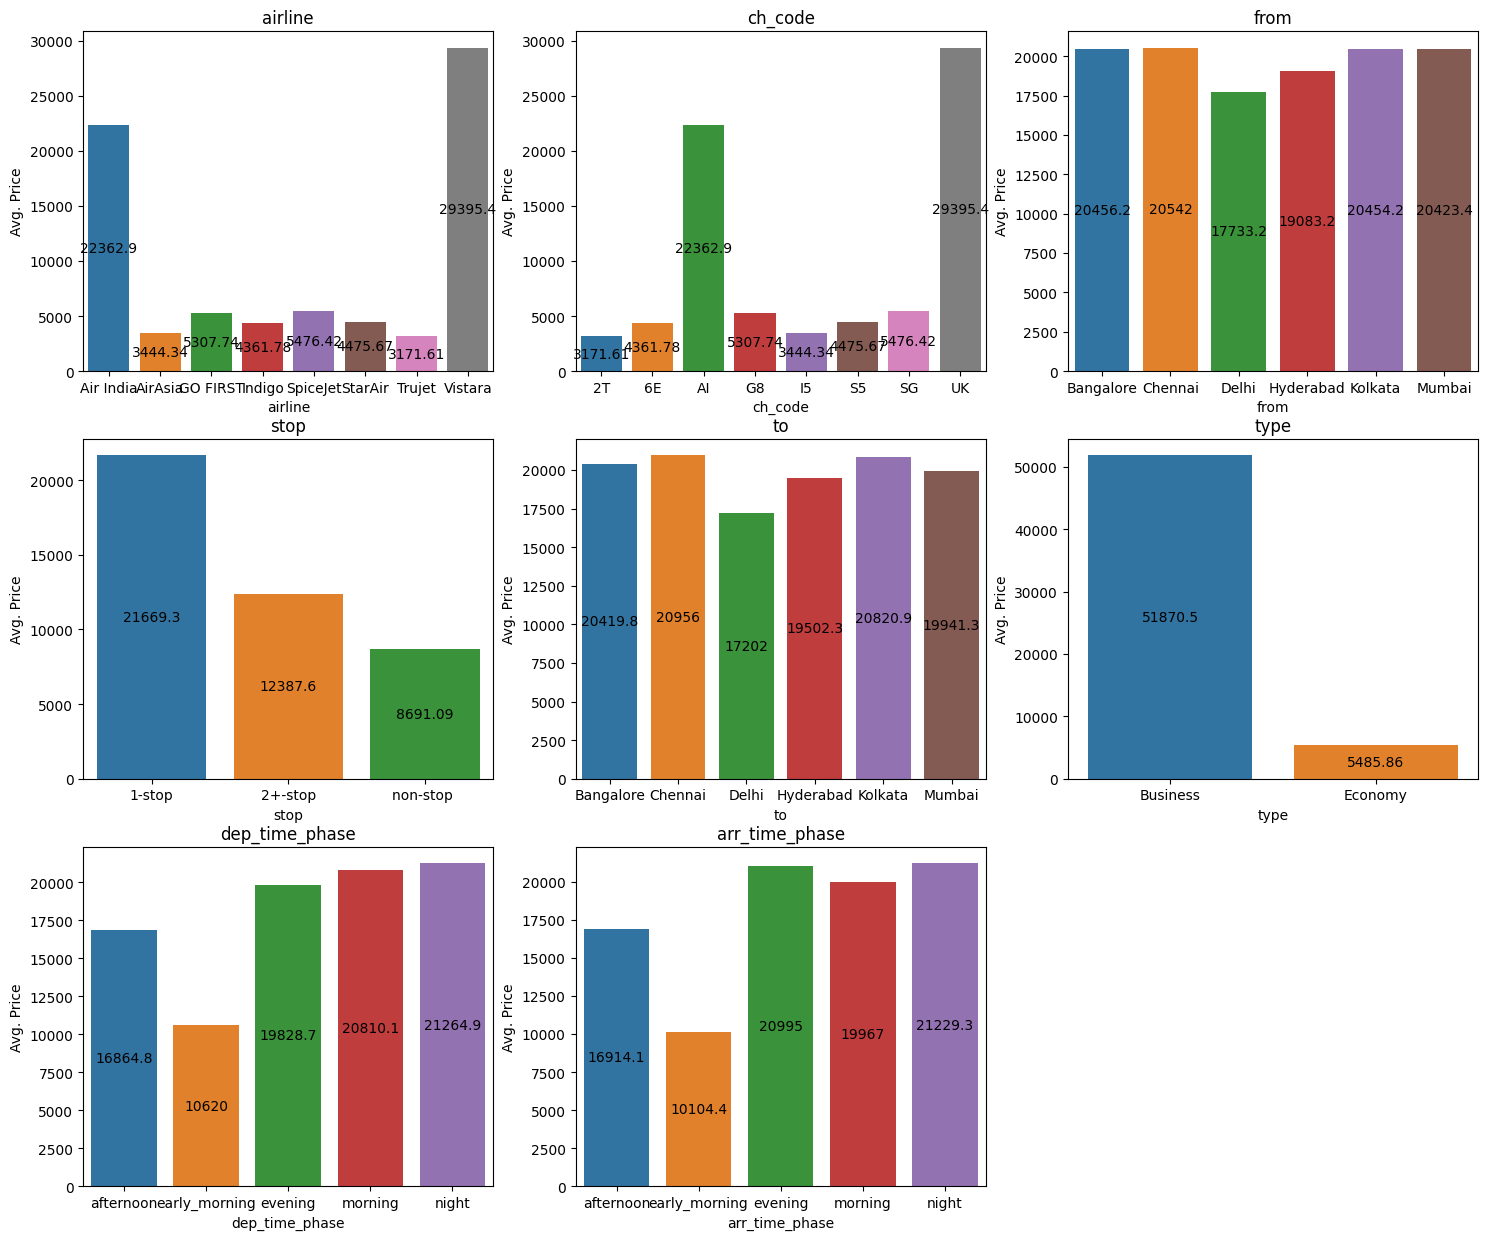

In [217]:
fig = plt.figure(figsize=(18,15))
for index, col in enumerate(categorical_features):
    data = train[[col, 'price']]
    agg_data = data.groupby(by=[col]).mean().reset_index()
    ax3 = fig.add_subplot(3,3,index+1)
    ax3 = sns.barplot(x=agg_data[col], y=agg_data['price'])
    
    # Labelling
    ax3.set_title(col)
    ax3.set_ylabel('Avg. Price')
    ax3.bar_label(ax3.containers[0], label_type='center') # Plot absolute numbers
plt.show()

#### Export data

In [219]:
import os
interim_data_folder = "../data/processed"

processed_data.to_csv(interim_data_folder+"/processed.csv", index=False)
print('Processed cleaned file exported.')
print('List of files under ../data/processed: {0}'.format(os.listdir(interim_data_folder)))

Processed cleaned file exported.
List of files under ../data/interim: ['.gitkeep', 'processed_cleaned.csv']
